In [5]:
# Импорт необходимых библиотек
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Загрузка Fashion MNIST датасета
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [23]:
# Определение архитектуры модели
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = FashionClassifier()

# Определение функций потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

FashionClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


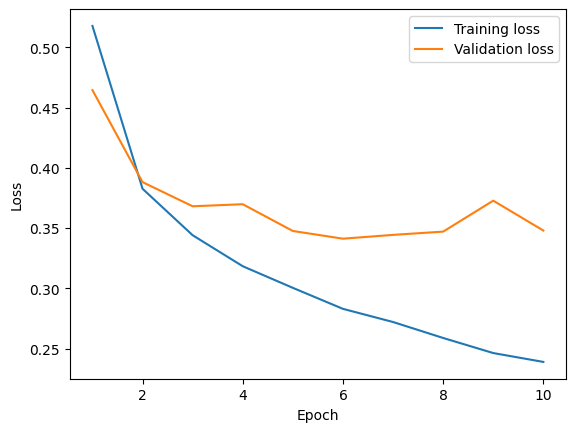

In [24]:
# Обучение модели
NUM_EPOCHS = 10
train_losses = []
test_losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Training loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Обучение на обучающей выборке показывает хорошие результаты. На тестовой выборке в 6 эпохе минимальная ошибка, дальше начинает расти, в 9 эпохе на промежутке от 3 до 10 локальный максимум лосса.

In [27]:
# Определение архитектуры модели
class FashionClassifierConv(nn.Module):
    def __init__(self):
        super(FashionClassifierConv, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FashionClassifierConv()

# Определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 10/10 [15:11<00:00, 91.13s/it]


FashionClassifierConv(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


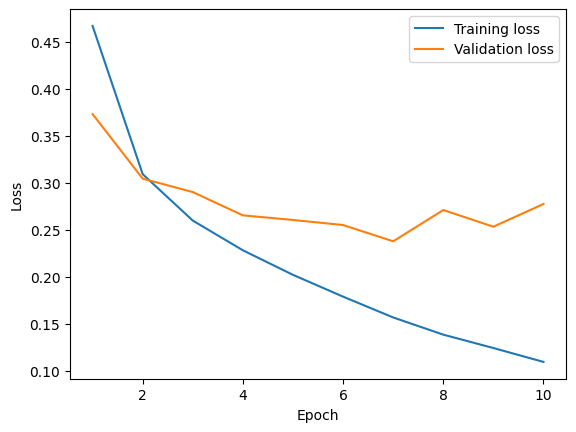

In [28]:
# Обучение модели
NUM_EPOCHS = 10
train_losses = []
test_losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    # Вычисление loss на тестовом датасете
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(testloader))

# Вывод summary модели
print(model)

# Визуализация графиков обучения
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Training loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Довольно схожая с первой кривая, но ошибка у этой модели с свёрткой стала меньше. Обучение модели с свёрткой было дольше, около 15 минут, а полносвязная около 4 минут.